In [1]:
#Dataset/Dataloader 실습

In [2]:
#Dataset=data와 label저장
#Dataloader=iterable한 객체로 감싸줘서 모델에 공급될 수 있도록 데이터 불러옴

In [3]:
#library import
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [4]:
# 고정
torch.manual_seed(42)

In [5]:
###########data Transform

transform = transforms.Compose( 
    [transforms.ToTensor(), #이미지가 0~1사이 값으로 변경->파이토치를 사용해서 분석을 진행하기 위해서는 이미지를 텐서로 변환하여 모델에 적용
     transforms.Normalize((0.5), (0.5))] #-1~1사이의 값으로 정규화 시킴 이미지마다 명도,채도등 다르기때문에 이미지를 동일한 환경에 맞춰줌 #channel이 한개이기 때문에 한개의 채널에만 적용
)

In [6]:
##Dataset 저장

train_data=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform #tensor로 변환
)

test_data=torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform #tensor로 변환
)

In [7]:
##EDA
import matplotlib.pyplot as plt

In [8]:
dir(train_data) #변수확인&매소드확인

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [9]:
train_data[1] #data tensor값, 라벨값 추출

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -1.0000,
           -1.0000, -1.0000, -1.0000, -0.6784,  0.4745, -0.1922, -0.5765,
           -0.6235, -0.6627, -0.3176,  0.3176,  0.0431, -0.8745, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -0.9922, -1.0000, -1.0000, -1.0000,
           -0.6157,  0.0667,  0.7176,  0.6941,  0.7882,  0.8510,  1.0000,
            1.0000,  1.0000,  1.0000,  0.7020,  0.6863,  0.9922,  0.8118,
            0.2549, -0.6471, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8902,  0.3804,
            0.7412,  0.7569,  0.6627,  0.5922,  0.5529,  0.5373,  0.5686,
            0.6863,  0.6000,  0.5843,  0.5765,  0.5765,  0.5765,  0.6392,
            0.7098,  0.7569,  0.2863, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.4745,  0.7176,
            0.5686,  0.5529,  0.584

In [10]:
#train data
print(train_data.classes) #클래스확인
print(type(train_data))
print(train_data.data[1,1])
print(train_data.data.size()) #train set은 6만개의 28x28사이즈 이미지로 구성됨

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
<class 'torchvision.datasets.mnist.FashionMNIST'>
tensor([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236, 255,
        255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,   0,   0],
       dtype=torch.uint8)
torch.Size([60000, 28, 28])


In [11]:
trainclass=train_data.classes
trainclass[0] #라벨값으로 class명 추출

'T-shirt/top'

In [12]:
#Data EDA
#class dictionary
labels_map={
    0: trainclass[0],
    1: trainclass[1],
    2: trainclass[2],
    3: trainclass[3],
    4: trainclass[4],
    5: trainclass[5],
    6: trainclass[6],
    7: trainclass[7],
    8: trainclass[8],
    9: trainclass[9],
}

print(labels_map)
print(labels_map[0]) #라벨값과 실제 클래스 이름 맵핑

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
T-shirt/top


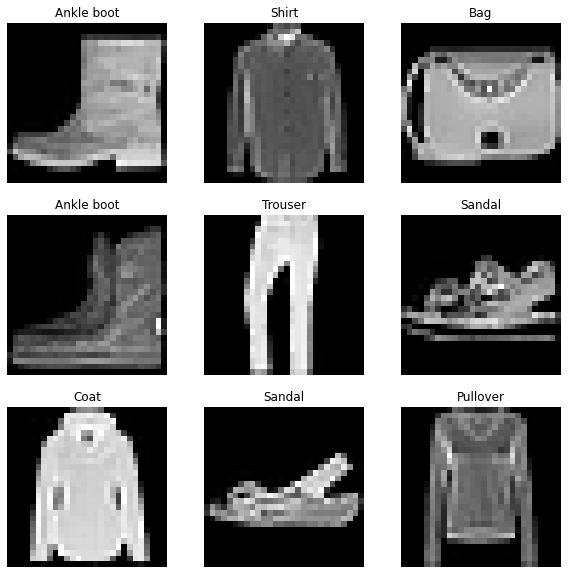

In [13]:
figure=plt.figure(figsize=(10,10)) #plt.figure()는 새로운 figure를 생성해준다

cols, rows= 3,3

for i in range(1,cols*rows+1): #for문을 통해 랜덤으로 0개의 데이터 뽑고 시각화 해주는 part
    sample_idx=torch.randint(len(train_data),size=(1,)).item() #1~60000중 랜덤숫자 추출
    img, label= train_data[sample_idx] #첫번째 텐서값을 이미지, 두번째 정수값을->라벨값으로
    figure.add_subplot(rows,cols,i) #figure.add_subplot(3,3,1),,,figure.add_subplot(3,3,9) 순서대로 이미지 나타내줌 key, value값
    plt.title(labels_map[label]) #해당라벨에대해서 label_map dic에서 텍스트값 추출 
    plt.axis('off') #axis제거
    plt.imshow(img.squeeze(),cmap='gray') #squeeze->차원이 1인 차원을 제거해줌, cmap='이미지컬러' ex) x=torch.ones(10,5,1,3,1)->x.squeeze()->torch.ones(10,5,3)으로 바꿔줌 바꿔주는 이유는? 차원을 축소하여 그래프를 알맞게 그리기 위함.
plt.show()

In [14]:
##test data
print(test_data.classes) #클래스확인
print(type(test_data))
print(test_data.data.size()) #train set은 6만개의 28x28사이즈 이미지로 구성됨

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
<class 'torchvision.datasets.mnist.FashionMNIST'>
torch.Size([10000, 28, 28])


In [15]:
##################train test class별 개수 구하기

train_class_count=dict()


for train_item in train_data: #이미지 텐서값 라벨값 반환
    label=train_data.classes[train_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in train_class_count: 
        train_class_count[label] =1 #첫번쨰로 라벨이 나오면 1로 주고 그다음부터 +1씩
    else:
        train_class_count[label] +=1
        
train_class_count

{'Ankle boot': 6000,
 'T-shirt/top': 6000,
 'Dress': 6000,
 'Pullover': 6000,
 'Sneaker': 6000,
 'Sandal': 6000,
 'Trouser': 6000,
 'Shirt': 6000,
 'Coat': 6000,
 'Bag': 6000}

In [16]:
##################train test class별 개수 구하기

test_class_count=dict()


for test_item in test_data:
    label=test_data.classes[test_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in test_class_count: #
        test_class_count[label]=1
    else:
        test_class_count[label] +=1
        
test_class_count

{'Ankle boot': 1000,
 'Pullover': 1000,
 'Trouser': 1000,
 'Shirt': 1000,
 'Coat': 1000,
 'Sandal': 1000,
 'Sneaker': 1000,
 'Dress': 1000,
 'Bag': 1000,
 'T-shirt/top': 1000}

In [17]:
'''
train data-> class별로 6000개
test data-> class별로 1000개
'''

'\ntrain data-> class별로 6000개\ntest data-> class별로 1000개\n'

In [18]:
#DATA LOADER

In [19]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2) 
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2) 

In [20]:
#trainloader.dataset

In [21]:
#testloader.dataset

In [22]:
#Dataloader EDA
#DataLoader를 통해 반복하기->이미지, 라벨 뽑아내기 EDA
#이미지와 라벨값을 표시

train_images, train_labels = next(iter(trainloader))
print(train_images) #이미지 텐서값 추출
print(train_labels) #라벨값 추출
###batch size-> 64개에 대한 텐서값, 라벨값 추출

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -0.9765, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7333, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.2235, -1.0000, -1.0000],
          ...,
          [-0.5216, -0.2784, -0.4118,  ..., -0.5373,  0.1451, -1.0000],
          [-1.0000, -1.0000, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9765, -0.9765, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.000

In [23]:
print(f"Feature batch shape: {train_images.size()}") #f'문자열 {변수} 문자열' f-string 64x1x28x28->(batch_size,channel,image height,image weight
print(f"Labels batch shape: {train_labels.size()}")
img=train_images[0].squeeze() #channel=1 이기때문에 1인차원을 scalar로 변환 채널을 없애야함. 채널을 없애줘야 화면에 그릴수 있음, 1인차원을 없애주어야함(Invalid dimensions for image data)
label=train_labels[0]
print(train_labels[0])
print(img.size())
#이미지별 라벨별 사이즈. 이미지는 64x1x28x28 label=64개
#matplotlib에서 흑백 두톤만 가지는 그래프는 채널 즉 1인차원을 없애줘야함

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tensor(5)
torch.Size([28, 28])


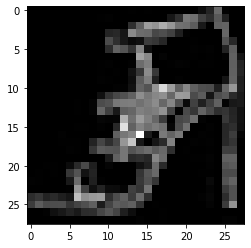

Label:5
Class name:Sandal


In [24]:
plt.imshow(img,cmap='gray')
plt.show()
print(f'Label:{label}')
labeling=int(label)
print(f'Class name:{labels_map[labeling]}')

In [25]:
############내가 이미지를 가지고있는경우
###########Custom dataset만들기

In [26]:
# Custom dataset, Transform, DataLoader 생성

class Customdataset(Dataset): #Dataset 상속받음->from torch.utils.data import Dataset, DataLoader여기서 Dataset클래스 상속받음(데이터를 활용하고 모델에 입력하기위해)
    def __init__(self,np_data,transform=None): #모델에 사용할 데이터를 담아둠, 모델에 사용할 데이터 저장
        self.data=np_data #데이터 저장
        self.transform=transform #데이터 전처리
        self.len=np_data.shape[0] #torch.Size([60000, 28, 28]) 첫번째가 전체 데이터 개수이기 때문에 0으로
    def __len__(self): #데이터 개수 리턴, 학습에 사용할 데이터의 총개수 얼마만큼의 인덱스를 사용할지 반환해줌
        return self.len
    def __getitem__(self,idx): #index에 해당하는 데이터를 리턴해줌, numpy나 tensor형식으로 반환함
        sample=self.data[idx]
        if self.transform: #데이터 변환까지 하고 가져오기
            sample = self.transform(sample)
        return sample

In [27]:
#transform 생성

def square(sample):
    return sample**2

In [28]:
transform1=transforms.Compose([square])

In [29]:
np_data = np.arange(12)
np_data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
custom_dataset=Customdataset(np_data,transform=transform1)

In [31]:
print(type(custom_dataset))
print(custom_dataset[3])
print(len(custom_dataset))

<class '__main__.Customdataset'>
9
12


In [32]:
custom_dataloader=DataLoader(custom_dataset,batch_size=2,shuffle=True) #데이터로더 생성

In [33]:
print(type(custom_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [34]:
for epoch in range(3): #epoch
    for data in custom_dataloader:
        print(data)
    print("=="*20)

tensor([ 4, 64], dtype=torch.int32)
tensor([81, 16], dtype=torch.int32)
tensor([ 25, 100], dtype=torch.int32)
tensor([49, 36], dtype=torch.int32)
tensor([121,   1], dtype=torch.int32)
tensor([0, 9], dtype=torch.int32)
tensor([81, 25], dtype=torch.int32)
tensor([64, 16], dtype=torch.int32)
tensor([ 49, 121], dtype=torch.int32)
tensor([36,  0], dtype=torch.int32)
tensor([100,   4], dtype=torch.int32)
tensor([9, 1], dtype=torch.int32)
tensor([4, 9], dtype=torch.int32)
tensor([64,  1], dtype=torch.int32)
tensor([ 16, 121], dtype=torch.int32)
tensor([25,  0], dtype=torch.int32)
tensor([36, 49], dtype=torch.int32)
tensor([100,  81], dtype=torch.int32)


In [35]:
#Model 생성

In [36]:
'''
device= 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
#GPU사용
'''

"\ndevice= 'cuda' if torch.cuda.is_available() else 'cpu'\nprint('Using {} device'.format(device))\n#GPU사용\n"

In [37]:
import torch.nn as nn #deep learning model에 필요한 모듈이 모아져있는 패키지, 신경망을 구축하기 위한 데이터 구조나 레이어 정의

In [38]:
#Model Class만들기

class NeuralNetwork(nn.Module): #nn.Module 상속
    def __init__(self):
        super(NeuralNetwork,self).__init__() #상위클래스상속
        self.flatten=nn.Flatten() #28x28->flatten vector
        self.linear_relu_stack=nn.Sequential( #한번에 묶어서
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Dropout(0.2), #주로 activation function 뒤에 적용해줌, 신경망에서 노드를 제거하여 학습하는것, 과적합될 가능성을 줄여줌 p=probability of an element to be zeroed. Default: 0.5, 20%의 노드를 사용하지 않음.
            nn.Linear(128,10)
        )
        
    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x) #layer 2개
        return logits
        
model=NeuralNetwork()     
#Convolution->batch normalization->activation->dropout->pooling 참조:Stackoverflow

In [39]:
'''
#model instance 생성, device생성

model=NeuralNetwork().to(device) #gpu로 모델 보내줌->이유:
print(model)
'''

'\n#model instance 생성, device생성\n\nmodel=NeuralNetwork().to(device) #gpu로 모델 보내줌->이유:\nprint(model)\n'

In [40]:
#random data만들어 예측

X=torch.rand(1,28,28)
print(X)
logits=model(X) #10개의 텐서값으로 반환
pred_probab=nn.Softmax(dim=1)(logits) #softmax->적용 전체합이 1이되도록 반환 loss.function
y_pred=pred_probab.argmax(1) #텐서에 있는 가장 큰값 인덱스 추출, 행기준이기 때문에 1을넣어줌 열기준이면 0
print(f'predicted class:{y_pred}')

tensor([[[0.2033, 0.0645, 0.6393, 0.2618, 0.2791, 0.9227, 0.3130, 0.4312,
          0.1077, 0.5747, 0.2557, 0.9543, 0.8679, 0.7887, 0.2084, 0.0710,
          0.9472, 0.1669, 0.8830, 0.7925, 0.3337, 0.2339, 0.0429, 0.9055,
          0.5024, 0.1990, 0.2631, 0.1090],
         [0.8334, 0.1268, 0.6160, 0.9544, 0.9768, 0.9326, 0.5073, 0.2735,
          0.2957, 0.0299, 0.5328, 0.0732, 0.9749, 0.3388, 0.4118, 0.1498,
          0.7350, 0.0706, 0.4851, 0.4329, 0.5190, 0.5741, 0.8203, 0.0053,
          0.4081, 0.6129, 0.9060, 0.0570],
         [0.5298, 0.1459, 0.9640, 0.2670, 0.8325, 0.0725, 0.1981, 0.0660,
          0.8644, 0.3551, 0.4465, 0.7633, 0.2927, 0.1522, 0.9598, 0.6527,
          0.9415, 0.7448, 0.9547, 0.9295, 0.6056, 0.4600, 0.2791, 0.9223,
          0.0527, 0.4657, 0.3172, 0.3639],
         [0.4653, 0.0596, 0.0819, 0.2477, 0.3949, 0.0515, 0.6849, 0.6479,
          0.3795, 0.6551, 0.0159, 0.3150, 0.5594, 0.8073, 0.1502, 0.6363,
          0.1249, 0.5515, 0.9637, 0.1465, 0.0478, 0.7905,

In [52]:
print(logits) #10개의 출력값 반환
print(pred_probab) #0~1사이 확률값, softmax함수를 거쳐서
print(torch.sum(pred_probab)) #10개의 확률을 더하면 1
y_pred=torch.argmax(pred_probab) #가장 큰 확률을 가진 인덱스 값
print(y_pred) #가장큰값 인덱스 반환

tensor([[-0.2773,  0.0631,  0.0208,  0.1170,  0.1402, -0.1274, -0.1204, -0.1503,
         -0.0758,  0.0934]], grad_fn=<AddmmBackward0>)
tensor([[0.0776, 0.1090, 0.1045, 0.1150, 0.1177, 0.0901, 0.0907, 0.0881, 0.0949,
         0.1124]], grad_fn=<SoftmaxBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)
tensor(4)


In [41]:
'''
y_pred=pred_probab.argmax(1)
print(y_pred)
'''

'\ny_pred=pred_probab.argmax(1)\nprint(y_pred)\n'

In [42]:
'''
50000/64
'''

'\n50000/64\n'

In [43]:
######실제데이터 Training

In [44]:
loss_fn=nn.CrossEntropyLoss() #다중분류

In [45]:
#optimizer
import torch.optim as optim #학습에 관련된 optimizing method가 있는 패키지

In [46]:
learning_rate=1e-3
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate) #weight update

In [47]:
#load the Tensorboard
%load_ext tensorboard

In [48]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./logs/Tensorboard3')

In [55]:
writer = SummaryWriter('./logs/Tensorboard3')

In [56]:
# 새모델 instance 생성

model1=NeuralNetwork()
print(model1)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [57]:
#모델 학습 Part


def train_loop(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset) #데이터의 전체개수
    num_batches_train=len(dataloader)
    total_loss=0.0
    print(f'데이터 전체 사이즈:{size}, 총 배치수:{num_batches_train}') #1
    for batch, data in enumerate(dataloader): #이미지와 라벨값 추출 배치단위로, batch 써준이유는 밑에 200번의 배치마다 Loss값을 출력하기위함,0부터 시작
        inputs,labels=data
        pred=model(inputs) #dataloader에서 이미지 데이터 부분을 학습
        loss=loss_fn(pred,labels) #model을통해 나온 최종 예측값, 실제 라벨값과의 차이를 계산해주는 부분.
        
        #backpropagation
        optimizer.zero_grad() #이전 데이터의 미분값이 다음 데이터 역전파의 미분값에 누적되는 것을 방지하기 위해 사용
        loss.backward() #backpropagation
        optimizer.step() #weight bias step마다 업데이트
        
        if batch % 200 == 0: #200번 배치마다 loss값 출력, 현재까지 몇개했는지 출력
            loss,current = loss.item(), batch * len(X) # 64개의 로스 평균값임-> loss=0,200,,400번째 loss 0.17171473801136017이런식으로 나옴 current= [0:937]*64
            print(f'current: {current}') #0
            print(f'loss: {loss:>7f} [{current:5d}/{num_batches_train:>5d}]') #0.163
        total_loss += loss/ len(dataloader) # sum(loss[batch[index]])/987,987개 배치에대한 loss값 다 더해준후 batch 개수로 나눠줌
    return total_loss

            
# For Test
def test_loop(dataloader,model,loss_fn):
    size=len(dataloader.dataset) #10000
    num_batches=len(dataloader) #전체데이터를 배치로 나눈 길이 10000/64=157
    print(f'데이터 전체 사이즈:{size}, 총 배치수:{num_batches}')
    test_loss, correct= 0,0 #0으로만들어주고 시작
    
    with torch.no_grad(): #gradient 계산 X
        for data in dataloader:
            images, labels= data
            pred=model(images)
            test_loss += loss_fn(pred,labels).item() #torch tensor중 scalar값을 뽑아줌, batch당 loss값 더해줌 총 157번 더해줌 ex) 0.5587,,,,,157개
            correct += (pred.argmax(1) ==labels).type(torch.float).sum().item() #각 배치 64개마다 맞춘 개수 더해줌 총 8735개 correctn ex)[54.0, 112.0]
            
            
    test_loss/=num_batches #전체loss sum/157->
    correct /= size #배치당 correct개수/10000->
    print(f'Test Error :\n Accuracy: {(100*correct): 0.1f}%, AVG loss: {test_loss: >7f} \n')
    return test_loss

In [58]:
#학습 진행
parameters=['weight1','bias1', 'weight2', 'bias']

epochs = 10
for t in range(epochs):
    print(f'Epoch {t+1}\n-----------')
    train_loss=train_loop(trainloader,model,loss_fn,optimizer)
    writer.add_scalar('train_loss',train_loss,t) #writer.add_scalar(제목,표현할 값,epoch값), 한그래프에 여러 변수를 그릴경우에 dict형태로 넘겨준다,
    for param, name in zip(model.parameters(),parameters):
        writer.add_histogram(name,param,t) #EPOCH마다 저장
    test_loss=test_loop(testloader,model,loss_fn)
    writer.add_scalar('test_loss', test_loss,t)
print('학습 완료')

Epoch 1
-----------
데이터 전체 사이즈:60000, 총 배치수:938
current: 0
loss: 0.163106 [    0/  938]
current: 200
loss: 0.133846 [  200/  938]
current: 400
loss: 0.293826 [  400/  938]
current: 600
loss: 0.178664 [  600/  938]
current: 800
loss: 0.260129 [  800/  938]
데이터 전체 사이즈:10000, 총 배치수:157
Test Error :
 Accuracy:  86.4%, AVG loss: 0.380808 

Epoch 2
-----------
데이터 전체 사이즈:60000, 총 배치수:938
current: 0
loss: 0.419686 [    0/  938]
current: 200
loss: 0.301007 [  200/  938]
current: 400
loss: 0.229246 [  400/  938]
current: 600
loss: 0.254625 [  600/  938]
current: 800
loss: 0.114300 [  800/  938]
데이터 전체 사이즈:10000, 총 배치수:157
Test Error :
 Accuracy:  86.3%, AVG loss: 0.387177 

Epoch 3
-----------
데이터 전체 사이즈:60000, 총 배치수:938
current: 0
loss: 0.362429 [    0/  938]
current: 200
loss: 0.353627 [  200/  938]
current: 400
loss: 0.403171 [  400/  938]
current: 600
loss: 0.210858 [  600/  938]
current: 800
loss: 0.273472 [  800/  938]
데이터 전체 사이즈:10000, 총 배치수:157
Test Error :
 Accuracy:  87.1%, AVG loss: 

In [59]:
writer.close()

In [61]:
%tensorboard --logdir './logs/Tensorboard3'